In [34]:
#Author - Matthew Ritter
import pandas as pd

In [35]:
from matplotlib import pyplot as plt

In [36]:
def ConvertToInt(value):
    if (value == "female"):
        value = 0
    else:
        value = 1
    return value

In [37]:
df = pd.read_csv('titanic.csv')
print(df.head())
print(df.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [38]:
df = df.drop("PassengerId", axis = 1)
df = df.drop("Name", axis = 1)
df = df.drop("Ticket", axis = 1)
df = df.drop("Cabin", axis = 1)
df = df.drop("Embarked", axis = 1)
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [39]:
survivedCol = df["Survived"]
df = df.drop("Survived", axis = 1)
print(df.head())
df["Survived"] = survivedCol
print(df.head())
df["Sex"] = df["Sex"].apply(ConvertToInt)
print(df.head())







   Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  22.0      1      0   7.2500
1       1  female  38.0      1      0  71.2833
2       3  female  26.0      0      0   7.9250
3       1  female  35.0      1      0  53.1000
4       3    male  35.0      0      0   8.0500
   Pclass     Sex   Age  SibSp  Parch     Fare  Survived
0       3    male  22.0      1      0   7.2500         0
1       1  female  38.0      1      0  71.2833         1
2       3  female  26.0      0      0   7.9250         1
3       1  female  35.0      1      0  53.1000         1
4       3    male  35.0      0      0   8.0500         0
   Pclass  Sex   Age  SibSp  Parch     Fare  Survived
0       3    1  22.0      1      0   7.2500         0
1       1    0  38.0      1      0  71.2833         1
2       3    0  26.0      0      0   7.9250         1
3       1    0  35.0      1      0  53.1000         1
4       3    1  35.0      0      0   8.0500         0


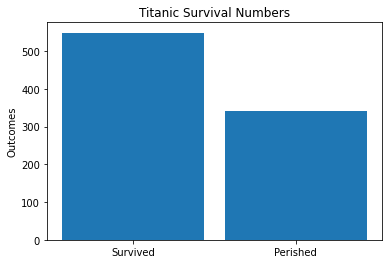

In [40]:
counts = df['Survived'].value_counts()
outcomes = (df['Survived'])
#width between bars
w = 0.35  
plt.bar(x=[0,.4], height=counts, width = w)
plt.xticks([0,.4], ("Survived", 'Perished'))

plt.ylabel('Outcomes')
plt.title('Titanic Survival Numbers')

plt.show()

The means of all columns are: 
Pclass     2.308642
Sex        0.647587
Age       29.699118
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64
The means of people that survived are: Pclass     1.950292
Sex        0.318713
Age       28.343690
SibSp      0.473684
Parch      0.464912
Fare      48.395408
dtype: float64
<class 'pandas.core.series.Series'>
The means of people that perished are: Pclass     2.531876
Sex        0.852459
Age       30.626179
SibSp      0.553734
Parch      0.329690
Fare      22.117887
dtype: float64


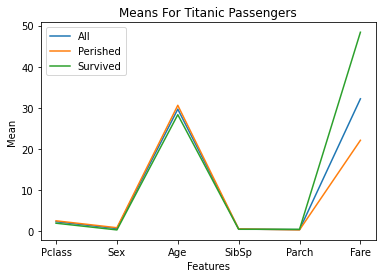

In [41]:

meansOfAll = df.mean()
del meansOfAll["Survived"]
print("The means of all columns are: ")
print(meansOfAll)


survivedBools = (df["Survived"] == 1)
perishedBools = (df["Survived"] == 0)



meansOfSurvived = df[survivedBools].mean()
del meansOfSurvived["Survived"]
print("The means of people that survived are: " + str(meansOfSurvived))


meansOfPerished = df[perishedBools].mean()
print(type(meansOfPerished))
del meansOfPerished["Survived"]
print("The means of people that perished are: " + str(meansOfPerished))

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]



plt.plot(features, meansOfAll)
plt.plot(features, meansOfPerished)
plt.plot(features, meansOfSurvived)
plt.legend(["All", "Perished", "Survived"])
plt.title('Means For Titanic Passengers')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'ax'

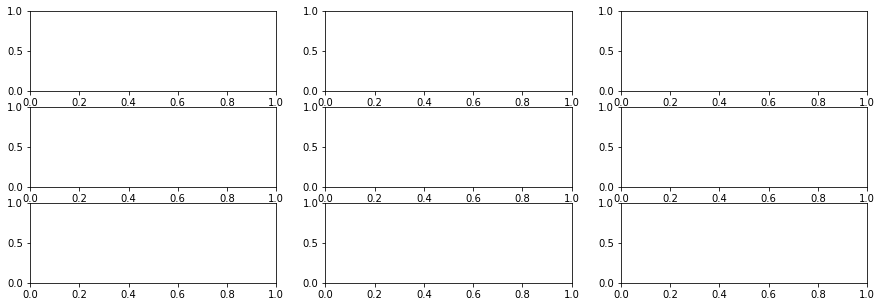

In [42]:

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,5))

counter = 0
for feature in features:
    inputData = [(meansOfAll[feature]), (meansOfPerished[feature]), (meansOfSurvived[feature])]
    dfData = pd.DataFrame(data = inputData)

    colors = ['b', 'r', 'g']

    barPlot = dfData.ax[counter % 3, counter % 3].plot.bar(width = 1, color = colors)
    plt.title(feature)
    plt.show()
    counter += 1



In [ ]:

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,10))

counter = 100
i = 0
plots = 0
for feature in features:
    row = 0
    if (i > 2):
        row = 1

    plots = ax[row][i % 3].bar(x=[1,2,3], height= [meansOfAll[feature], meansOfPerished[feature], meansOfSurvived[feature]], width=1, color=["b", "r", "g"])
    ax[row][i % 3].set_title(feature)
    counter += 1
    i += 1
plt.show()

In [ ]:
correlations = abs(df[df.columns[1:]].corr()['Survived'][:])

In [43]:
print(correlations)

Sex         0.543351
Age         0.077221
SibSp       0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64


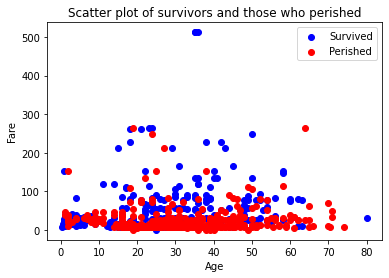

In [44]:
survivedDF = df[survivedBools]

perishedDF = df[perishedBools]



plt.scatter(survivedDF["Age"], survivedDF["Fare"], color = "blue")
plt.scatter(perishedDF["Age"], perishedDF["Fare"], color = "red")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter plot of survivors and those who perished")
plt.legend(["Survived", "Perished"])
plt.show()
